In [1]:
#import warnings
#import pandas as pd
import numpy as np
from datasets import load_from_disk
import torch
import pandas as pd

sys.path.insert(0,'/zhome/94/5/127021/speciale/master_project')
from src.models.tcav.TCAV import get_preds_tcavs

# from src.data.embedding_layer_rep import create_embedding

In [ ]:
counter_set='tweet_random'
num_ex_in_set = 100
Data = counter_set 
layer_nr = 11
num_random_set = 300
file_name =  f'tensor_{Data}_on_{layer_nr}_layer_dropout_{num_random_set}_sets_with_{num_ex_in_set}' # f'tensor_{Data}_on_{layer_nr}_layer_{num_random_set}_sets_with_{num_ex_in_set}'
file_random = PATH_TO_Data +  Data + '/' + file_name + '.pt'
random_rep = torch.load(file_random)

In [54]:
PATH_TO_Data = '/work3/s174498/concept_random_dataset/'
Data = 'tweet_random'
classifier = 'linear'
num_random_set = 300
num_ex_in_set = 100
model_layer_num = 8
name = f'tensor_{Data}_on_{model_layer_num}_layer_dropout_{num_random_set}_sets_with_{num_ex_in_set}'
file_random = PATH_TO_Data + Data + '/' + name + '.pt'
random_rep_3 = torch.load(file_random)


In [55]:
rep = np.append(random_rep_3,random_rep_2, axis=0)

In [56]:
num_random_set = 500
num_ex_in_set = 120
model_layer_num = 8
name = f'tensor_{Data}_on_{model_layer_num}_layer_dropout_{num_random_set}_sets_with_{num_ex_in_set}'

file_random = PATH_TO_Data + Data + '/' + name + '.pt'
torch.save(rep, file_random)

In [24]:

A = [random_rep[i] for i in list(np.random.choice(len(random_rep),2))]
len(A)

2

In [19]:
M = 10 
N = 25
random_examples = [random_text[i]for i in list(np.random.choice(len(random_text),N*M))]

In [20]:
random_examples[0]

'@user ATTENTION! A North Carolina Twitter User...@USER is publicizing an ANTIFA TARGET LIST with the names of high profile AND everyday Trump supporters. Twitter has been informed. They have NOT suspended this account. Check out his Lists"".""'

In [12]:
Data = 'wikipedia_split'
random_data = load_from_disk(PATH_TO_Data + Data)
random_text = random_data['complex_sentence']

In [13]:
random_text[0]

"' '' As she translates from one language to another , she tries to find the appropriate wording and context in English that would correspond to the work in Spanish her poems and stories started to have differing meanings in their respective languages ."

In [6]:
import pickle
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

PATH_grad = '/work3/s174498/sst2_dataset/grads_logits/'+'linear'+'_class_'+str(0)+'_layer_'+str(11)+'.pkl'
with open(PATH_grad,'rb') as handle:
    data = pickle.load(handle)
grads = data['grads']
grads

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [4]:
run_it_all = False
if run_it_all:
    Data = 'wikipedia_split'
    model_layer = '11'
    num_random_set = 500
    num_ex_in_set = 150

    name = f'tensor_{Data}_on_{model_layer}_layer_{num_random_set}_sets_with_{num_ex_in_set}'
    PATH_TO_Data = '/work3/s174498/concept_random_dataset/'

    file = PATH_TO_Data + Data + '/' + name + '.pt'
    random_rep = torch.load(file)

    lab = []
    x = []
    x.extend(random_rep[j*5:(j+1)*5])
    x.extend(random_rep[i*5:(i+1)*5])
    x = np.array(x)


    Data = 'wikipedia_split'
    classifier = 'linear'
    model_layer = '11'
    num_random_set = 1
    num_ex_in_set = 150

    name = f'tensor_{Data}_on_{model_layer}_{num_random_set}_sets_with_{num_ex_in_set}'
    PATH_TO_Data = '/work3/s174498/concept_random_dataset/'

    x = torch.tensor([0, 1, 2, 3, 4])
    file = PATH_TO_Data + Data + '/' + name + '.pt'
    print('FILE', file)
    torch.save(x, file)

    PATH_TO_Data = '/work3/s174498/concept_random_dataset/'
    Data = 'wikipedia_split'
    random_data = load_from_disk(PATH_TO_Data + Data)
    random_text = random_data['complex_sentence']

    data = random_text
    model_layer = "roberta.encoder.layer.11.output.dense"
    random_rep = create_embedding(random_text, classifier, model_layer, num_random_set= num_random_set, num_ex_in_set= num_ex_in_set )

    name = f'tensor_{Data}_on_{model_layer_num}_layer_{num_random_set}_sets_with_{num_ex_in_set}'


In [5]:
# load
datadir = '/work3/s174498/sst2_dataset/'
N = 150
#test_0_dataset = load_from_disk(datadir + 'test_0_dataset')
test_1_dataset = load_from_disk(datadir + 'test_1_dataset')

filename = "/work3/s174498/sst2_dataset/positive"

ds_pos = load_from_disk(filename)
ds_pos_text = ds_pos['sentence']

filename = "/work3/s174498/sst2_dataset/test_0_dataset"
ds_neg = load_from_disk(filename)
ds_neg_text = ds_neg['sentence']

pos = [ds_pos_text[i] for i in list(np.random.choice(len(ds_pos_text),N))]
neg = [ds_neg_text[i] for i in list(np.random.choice(len(ds_neg_text),N))]

In [6]:
M = 150
# load
datadir = '/work3/s174498/concept_random_dataset/'
filename = 'tweet_hate/test'
ds_hate = load_from_disk(datadir + filename)

df_label_hate = pd.DataFrame(ds_hate['label'])
idx_hate = df_label_hate[df_label_hate[0] == 1].index.values

ds_hate = ds_hate['text']
#hate = [ds_hate[i] for i in list(np.random.choice(len(ds_hate),M))]
hate = [ds_hate[i] for i in list(np.random.choice( idx_hate,M))]

In [7]:
M = 150
# load
datadir = '/work3/s174498/concept_random_dataset/'
filename = 'tweet_irony/test'
ds_irony = load_from_disk(datadir + filename)

df_label_irony = pd.DataFrame(ds_irony['label'])
idx_irony = df_label_irony[df_label_irony[0] == 1].index.values

ds_irony = ds_irony['text']
print('len', len(ds_irony))
irony = [ds_irony[i] for i in list(np.random.choice( idx_irony,M))]

len 784


In [8]:
M = 150
# load
datadir = '/work3/s174498/concept_random_dataset/'
filename = 'tweet_offensive/test'
ds_off = load_from_disk(datadir + filename)

df_label_off = pd.DataFrame(ds_off['label'])
idx_off = df_label_off[df_label_off[0] == 1].index.values

ds_off = ds_off['text']

offen = [ds_off[i] for i in list(np.random.choice( idx_off,M))]

In [21]:
# load
# really bad format !!!
filename = '20_newsgroups/test'
ds_news= load_from_disk(datadir + filename)
#print('Categories:\n',np.unique(ds_news['label_text']))

# labels: World (0), Sports (1), Business (2), Sci/Tech (3).
df_label_news = pd.DataFrame(ds_news['label'])
idx_baseball = df_label_news[df_label_news[0] == 9].index.values
idx_relg = df_label_news[df_label_news[0] == 15].index.values
idx_guns = df_label_news[df_label_news[0] == 16].index.values
idx_mac = df_label_news[df_label_news[0] == 4].index.values

ds_news = ds_news['text']
news = [ds_news[i] for i in list(np.random.choice(len(ds_news),M))]

news_base = [ds_news[i] for i in list(np.random.choice( idx_baseball,M))]
news_relg = [ds_news[i] for i in list(np.random.choice( idx_relg,M))]
news_guns = [ds_news[i] for i in list(np.random.choice( idx_guns,M))]
news_mac = [ds_news[i] for i in list(np.random.choice( idx_mac,M))]

In [10]:
# labels: World (0), Sports (1), Business (2), Sci/Tech (3).
filename = 'ag_news/test'
ag_news= load_from_disk(datadir + filename)

df_label_ag = pd.DataFrame(ag_news['label'])
idx_world = df_label_ag[df_label_ag[0] == 0].index.values
idx_sport = df_label_ag[df_label_ag[0] == 1].index.values
idx_buss = df_label_ag[df_label_ag[0] == 2].index.values
idx_sci = df_label_ag[df_label_ag[0] == 3].index.values

ag_news = ag_news['text']

In [11]:
ag_world = [ag_news[i] for i in list(np.random.choice( idx_world,M))]
ag_sport = [ag_news[i] for i in list(np.random.choice( idx_sport,M))]
ag_buss = [ag_news[i] for i in list(np.random.choice( idx_buss,M))]
ag_sci = [ag_news[i] for i in list(np.random.choice( idx_sci,M))]

### Testing the target class negative against 
#### Hate 

In [12]:
M = 150
# load
datadir = '/work3/s174498/concept_random_dataset/'
filefolder = 'wikipedia_20220301/gender_concepts/'
filename = 'Transsexual'
ds_trans = load_from_disk(datadir +filefolder + filename)
ds_trans['text_list']

In [8]:
num_random_set = 5

logits,sensitivity,TCAV, acc = get_preds_tcavs(classifier = 'linear',model_layer='roberta.encoder.layer.11.output.dense',layer_nr ='11',
                                    target_text = neg,desired_class=0,
                                    counter_set = 'wikipedia_split',concept_text =neg, 
                                    num_runs=num_random_set)

calculating cavs...


/zhome/94/5/127021/speciale/master_project/src/models/hate_tcav/Roberta_model_data.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/zhome/94/5/127021/speciale/master_project/src/models/hate_tcav/Roberta_model_data.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


>>> calculating logits and grads...
Accuracy over all:
0.8828282828282827
TCAV score for the concept: 
1.0 0.0


In [14]:
TCAV

[1.0, 1.0, 1.0, 1.0, 1.0]

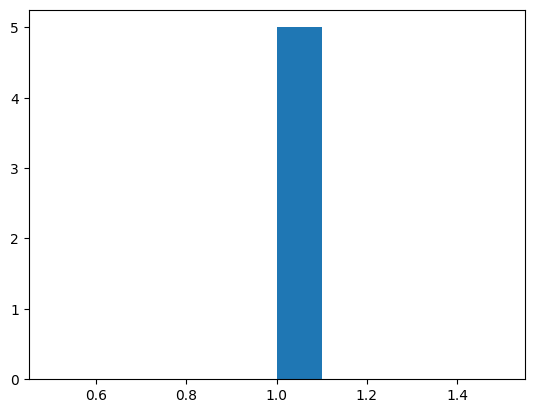

In [10]:
import matplotlib.pyplot as plt
plt.hist(TCAV)
plt.show() 

With 

    line 260 np.dot(grad,cav * -1) 

concept_neg, target_nec TCAV = 0.00826 (0.0742)

Virker mere korrect med 

    line 260 np.dot(grad,cav)

TCAV = 0.9769 (0.12686)

Men hvad med s>0 and

    line 260 np.dot(grad,cav * -1) 

no clue which 
TCAV = 0.9881 (0.09540)

In [ ]:
num_random_set = 500

logits,sensitivity,TCAV, acc = get_preds_tcavs(classifier = 'linear',model_layer='roberta.encoder.layer.11.output.dense',layer_nr ='11',target_text = neg,desired_class=0,counter_set = 'wikipedia_split',concept_text =neg, num_runs=num_random_set)

calculating cavs...


/zhome/94/5/127021/speciale/master_project/src/models/hate_tcav/Roberta_model_data.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/zhome/94/5/127021/speciale/master_project/src/models/hate_tcav/Roberta_model_data.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


>>> calculating logits and grads...
>>> sensitivet
 (500, 150)
>>> concetp cavs 500
>>> length of target text: 150
Accuracy over all:
0.9032525252525252
TCAV score for the concept: 
0.9881866666666668 0.09540370735866492


In [ ]:
kkk 

NameError: name 'kkk' is not defined

In [ ]:
num_random_set = 500

logits,sensitivity,TCAV, acc = get_preds_tcavs(classifier = 'linear',model_layer='roberta.encoder.layer.11.output.dense',layer_nr ='11',target_text = neg,desired_class=0,counter_set = 'wikipedia_split',concept_text =hate, num_runs=num_random_set)

calculating cavs...


/zhome/94/5/127021/speciale/master_project/src/models/hate_tcav/Roberta_model_data.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/zhome/94/5/127021/speciale/master_project/src/models/hate_tcav/Roberta_model_data.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


>> labels / y max: 1
>>> Class + IDX 0 
 [ True False  True  True False False False False False  True False False
  True  True  True False False  True  True False  True  True False  True
  True False  True  True False  True False False  True  True False False
 False  True  True  True  True False False  True False  True False False
  True False False False  True  True False  True False False False False
 False  True  True  True False False False False  True False  True False
  True  True  True False  True  True  True False  True  True  True  True
  True  True False  True False  True False False False  True  True  True
 False False False]
>>> label 2 text concept
>>> Class + IDX 1 
 [False  True False False  True  True  True  True  True False  True  True
 False False False  True  True False False  True False False  True False
 False  True False False  True False  True  True False False  True  True
  True False False False False  True  True False  True False  True  True
 False  True  True

KeyboardInterrupt: 

In [ ]:
logits,sensitivity,TCAV = get_preds_tcavs(classifier = 'linear',model_layer='roberta.encoder.layer.11.output.dense',desired_class=1,counter_set = 'wikipedia_split',concept_examples = neg,num_runs=5)

TypeError: get_preds_tcavs() got an unexpected keyword argument 'concept_examples'

In [ ]:
logits,sensitivity,TCAV = get_preds_tcavs(classifier = 'Founta',desired_class = 0,examples_set = 'random',concept_examples = neg,num_runs=175)

>>> load RSM /work3/s174498/final/original_head/checkpoint-500
roberta.encoder.layer.11.output.dense
Linear(in_features=3072, out_features=768, bias=True)
calculating cavs...


/zhome/94/5/127021/speciale/master_project/src/models/hate_tcav/Roberta_model_data.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/zhome/94/5/127021/speciale/master_project/src/models/hate_tcav/Roberta_model_data.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


>>> GET REPS concept repres (150, 768)
>>> calculating logits and grads...
/zhome/94/5/127021/speciale/master_project/notebooks
>>> FOR LOOP GRADS 200
>>> sensitivet
 [[-0.32946995 -0.3762316  -0.37264585 ... -0.32716873 -0.3995914
  -0.3363057 ]
 [-0.05316321 -0.11972028 -0.18315513 ... -0.07587533 -0.22036487
  -0.10244454]
 [-0.34740585 -0.38986558 -0.377735   ... -0.33894926 -0.40245044
  -0.34736216]
 ...
 [-0.3007218  -0.35548198 -0.39561194 ... -0.3091061  -0.41288307
  -0.33127677]
 [-0.20628703 -0.26678878 -0.33055857 ... -0.22072682 -0.35390756
  -0.24831821]
 [-0.27626154 -0.33367914 -0.38251525 ... -0.28909042 -0.4015702
  -0.31265745]]
>>> concetp cavs 175
(200, 175)
examples length 200
TCAV score for the concept: 
0.16397142857142855 0.005639076491188022


In [ ]:
logits,sensitivity,TCAV = get_preds_tcavs(classifier = 'Founta',desired_class = 1,examples_set = 'random',concept_examples = hate,num_runs=150)

>>> load RSM /work3/s174498/final/original_head/checkpoint-500
roberta.encoder.layer.11.output.dense
Linear(in_features=3072, out_features=768, bias=True)
calculating cavs...


/zhome/94/5/127021/speciale/master_project/src/models/hate_tcav/Roberta_model_data.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/zhome/94/5/127021/speciale/master_project/src/models/hate_tcav/Roberta_model_data.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


>>> GET REPS concept repres (200, 768)
>>> calculating logits and grads...
/zhome/94/5/127021/speciale/master_project/notebooks
>>> FOR LOOP GRADS 200
>>> sensitivet
 [[-0.5763484  -0.6256677  -0.6342381  ... -0.61625797 -0.5737675
  -0.6444334 ]
 [-0.5496734  -0.62009275 -0.63021547 ... -0.614389   -0.5422272
  -0.6349286 ]
 [-0.5524504  -0.61900556 -0.62839377 ... -0.6138998  -0.54682565
  -0.6349349 ]
 ...
 [-0.40301588 -0.47190544 -0.48724315 ... -0.46219224 -0.39935225
  -0.48812774]
 [-0.5646938  -0.6335531  -0.6428068  ... -0.6304109  -0.5566635
  -0.6488873 ]
 [-0.5071938  -0.5824376  -0.5933125  ... -0.58034813 -0.49805397
  -0.5964497 ]]
>>> concetp cavs 150
(200, 150)
examples length 200
TCAV score for the concept: 
0.04123333333333332 0.004240151988890126


In [ ]:
logits,sensitivity,TCAV = get_preds_tcavs(classifier = 'Founta',desired_class = 1,examples_set = 'random',concept_examples = pos,num_runs=150)

>>> load RSM /work3/s174498/final/original_head/checkpoint-500
roberta.encoder.layer.11.output.dense
Linear(in_features=3072, out_features=768, bias=True)
calculating cavs...


/zhome/94/5/127021/speciale/master_project/src/models/hate_tcav/Roberta_model_data.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/zhome/94/5/127021/speciale/master_project/src/models/hate_tcav/Roberta_model_data.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


>>> GET REPS concept repres (150, 768)
>>> calculating logits and grads...
/zhome/94/5/127021/speciale/master_project/notebooks
>>> FOR LOOP GRADS 200
>>> sensitivet
 [[ 0.0460216   0.21050298  0.21091616 ...  0.18030001  0.05713004
   0.17740501]
 [ 0.02055839  0.20223744  0.20846844 ...  0.21574512  0.05785082
   0.16677406]
 [ 0.00779834  0.18219236  0.186719   ...  0.18796147  0.04499415
   0.15062419]
 ...
 [ 0.2541175   0.4407654   0.4514586  ...  0.44370875  0.29653287
   0.40431303]
 [-0.08421046  0.07827068  0.08002743 ...  0.09341226 -0.04665715
   0.04909039]
 [-0.00531835  0.1702322   0.1763019  ...  0.19970472  0.04050907
   0.13665774]]
>>> concetp cavs 150
(200, 150)
examples length 200
TCAV score for the concept: 
0.9708333333333333 0.07802439077337008
